<a href="https://colab.research.google.com/github/bruno353/Data_Science_Projects/blob/main/Projeto_Portf%C3%B3lio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset: https://www.kaggle.com/jealousleopard/goodreadsbooks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/desafio_2_-_case_de_anlise_de_dados.xlsx')
df.head()

,bookID,titulo,autores,nota_media,lingua_codigo,numero_paginas,avaliacoes_contagem,revisoes_contagem,publicacao_data,editora
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic


In [ ]:
#alguns autores aparecem como NOT A BOOK, não sabia se era pra tirar ou não, então deixei.

In [ ]:
#Analisando dados nulos:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
editora,0,0.0
publicacao_data,0,0.0
revisoes_contagem,0,0.0
avaliacoes_contagem,0,0.0
numero_paginas,0,0.0
lingua_codigo,0,0.0
nota_media,0,0.0
autores,0,0.0
titulo,0,0.0
bookID,0,0.0


#●	**Existe uma relação entre o número de páginas de um livro e a sua nota ou número de avaliações?**

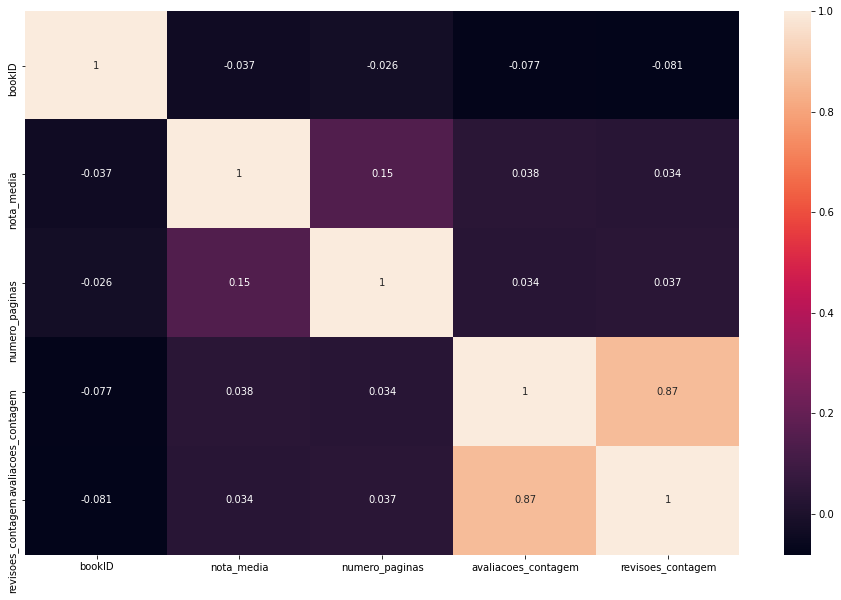

In [ ]:
#heatmap que mostra correlações entre variáveis
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


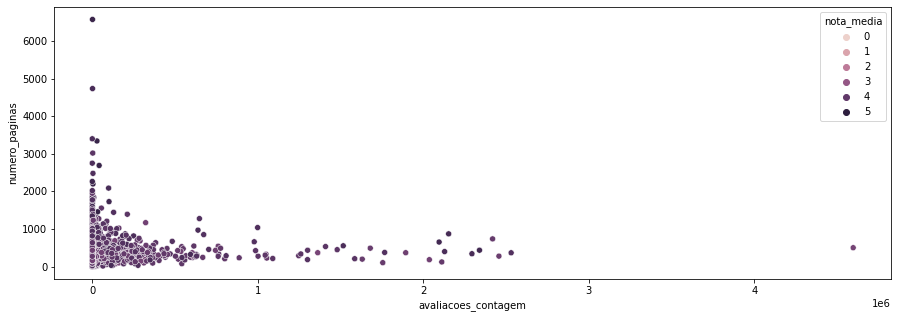

In [ ]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["avaliacoes_contagem"], df["numero_paginas"], hue = df["nota_media"])

No handles with labels found to put in legend.


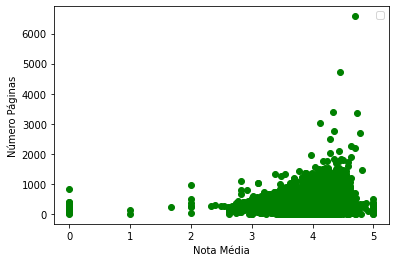

In [ ]:

plt.xlabel('Nota Média')
plt.ylabel('Número Páginas')
plt.scatter(df.nota_media,df.numero_paginas, color = 'green')
plt.legend()

<Figure size 1080x1080 with 0 Axes>

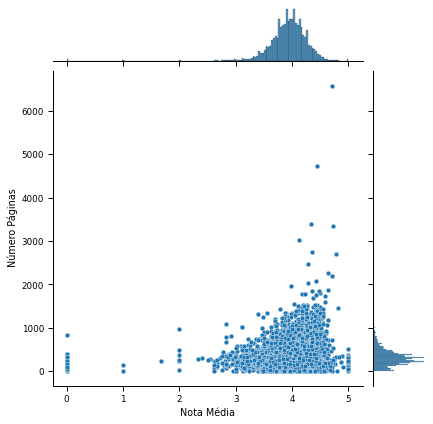

In [ ]:
plt.figure(figsize=(15,15))
sns.set_context('paper')
ax =sns.jointplot(x="nota_media",y='numero_paginas', kind='scatter',  data= df[['nota_media', 'numero_paginas']])
ax.set_axis_labels("Nota Média", " Número Páginas")
plt.show()

<Figure size 1080x1080 with 0 Axes>

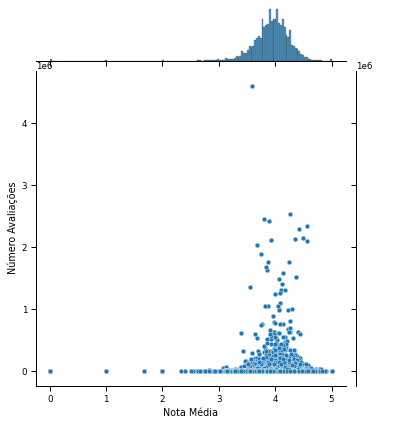

In [ ]:
plt.figure(figsize=(15,15))
sns.set_context('paper')
ax =sns.jointplot(x="nota_media",y='avaliacoes_contagem', kind='scatter',  data= df[['nota_media', 'avaliacoes_contagem']])
ax.set_axis_labels("Nota Média", " Número Avaliações")
plt.show()

<Figure size 1080x1080 with 0 Axes>

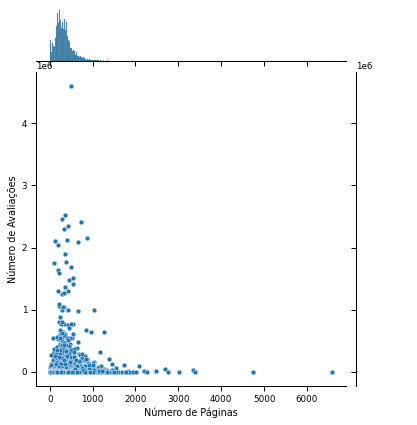

In [ ]:
plt.figure(figsize=(15,15))
sns.set_context('paper')
ax =sns.jointplot(y="avaliacoes_contagem",x='numero_paginas', kind='scatter',  data= df[['numero_paginas', 'avaliacoes_contagem']])
ax.set_axis_labels("Número de Páginas", " Número de Avaliações ")
plt.show()

***RESPOSTA PERGUNTA 1***:

**Correlação entre nota e número de páginas**:

Segundo o heatmap, existe uma boa correlação diretamente proporcional de 0.15.

Percebe-se, no gráfico da célula 9, uma leva correlação das notas de 2.5 até 4.5 com o número de pgs, em que o número de páginas cresce com uma leve inclinação. Mas nada muito claro.


**Correlação entre nota e número de avaliações**:

Segundo o heatmap, existe uma pequena correlação diretamente proporcional de 0.038.

Percebe-se, no gráfico da célula 10, que a maior parte do número de avaliações se localiza entre notas de 3.5 até 4.5.

Na célula 11 se percebe que a maior quantidade de avaliações fica em livros com até 1000 páginas.

#**●	Quais os autores e autoras mais lidos? E os mais bem avaliados?**

In [ ]:
df.loc[df['nota_media'] == 5, 'autores'].value_counts()

NOT A BOOK                                              2
Chris    Green/Chris Wright/Paul Douglas Gardner        1
Tim Bogenn                                              1
Tara MacCarthy                                          1
Sheri Rose Shepherd                                     1
Ian        Martin/Katie Elliott                         1
Julie Sylvester/David Sylvester                         1
John  Diamond                                           1
Todd Davis/Marc Frey                                    1
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    1
Middlesex Borough Heritage Committee                    1
Sara Barton-Wood                                        1
James E. Campbell                                       1
Keith Donohue                                           1
Aristophanes/F.W. Hall/W.M. Geldart                     1
R. McL. Wilson                                          1
Nicholas    Evans/Rhonda  Evans                         1
Dennis Adler/R

In [ ]:
df['autores'].describe()

count              11127
unique              6639
top       P.G. Wodehouse
freq                  40
Name: autores, dtype: object

In [ ]:
df['autores'].value_counts()

P.G. Wodehouse                                                                                      40
Stephen King                                                                                        40
Rumiko Takahashi                                                                                    39
Orson Scott Card                                                                                    35
Agatha Christie                                                                                     33
                                                                                                    ..
Lonely Planet/Sarah Johnstone/Tom Masters                                                            1
Paul Davies                                                                                          1
Lori Avocato/Dana Cameron/Mary Dahiem/Suzanne Macpherson/Cait London/Kerrelyn Sparks/Mary Daheim     1
Barron's                                                                 

In [ ]:
df['nota_media'].describe()

count    11127.000000
mean         3.933664
std          0.352455
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: nota_media, dtype: float64

In [ ]:
df.loc[df['nota_media']>3.93, "autores"].value_counts()

Rumiko Takahashi                                           38
P.G. Wodehouse                                             34
Stephen King                                               25
Mercedes Lackey                                            23
Terry Pratchett                                            20
                                                           ..
Jiddu Krishnamurti/D. Rajagopal                             1
R.C. Sproul                                                 1
Andrew P. Trout                                             1
Nancy Cote/Cornelia Maude Spelman                           1
Aeschylus/David Grene/Richmond Lattimore/Seth Benardete     1
Name: autores, Length: 3855, dtype: int64

In [ ]:
df[['nota_media','autores']].sort_values(by=['nota_media', 'autores'], ascending=False).value_counts()


nota_media  autores                   
4.11        Arthur Golden                 7
3.93        Toni Morrison                 6
4.36        Tite Kubo                     5
4.02        Stephen King                  5
3.96        Stephen King                  5
                                         ..
4.06        Nicholas Evans                1
            Neil Gaiman/Dave McKean       1
            Nassim Nicholas Taleb         1
            Michael Pollan/Scott Brick    1
0.00        Andrew      Hunt              1
Length: 10234, dtype: int64

***RESPOSTA PERGUNTA 2***

Como visto na célula 14, dos 6639 autores e autoras,  **o autor mais lido é Stephen King e P.G Wodehouse**
com uma frequência de 40, seguidos por **Rumiko Takahashi**(39), **Orson Scott Card**(35) e **Agatha Christie** (33)

Na célula 12 pode-se perceber que não tem um autor que recebeu 5 estrelas mais de uma vez

Na célula 16 pode-se ver que **os autores mais bem avaliados - que estão acima da média de avaliação (3.93) - são:**
**Rumiko Takahashi**(38 vezes), **P.G. Wodehouse**(34 vezes), **Stephen King**(25 vezes), **Mercedes Lackey**(23 vezes) e **Agatha Christie** (20 vezes).




********************************************************************************************************************

#**● Livros mais antigos têm menos avaliações do que livros mais novos?**

<Figure size 1080x1080 with 0 Axes>

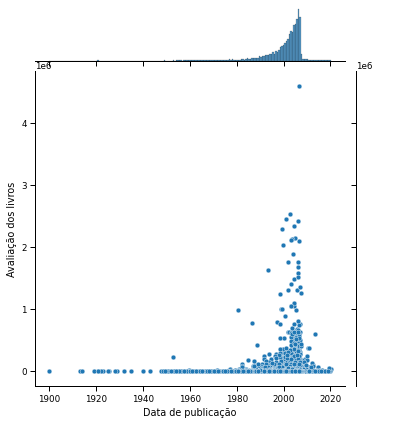

In [ ]:
plt.figure(figsize=(15,15))
sns.set_context('paper')
ax =sns.jointplot(x="publicacao_data",y='avaliacoes_contagem', kind='scatter',  data= df[['publicacao_data', 'avaliacoes_contagem']])
ax.set_axis_labels("Data de publicação", "Avaliação dos livros")
plt.show()

***RESPOSTA PERGUNTA 3***

No gráfico da célula 18 se observa que **as maiores contagens de avaliações ocorreram entre livros publicados de 1990 até meados de 2010**

Nos outros períodos houve um grande decréscimo do número de avaliações.

************************************************************************

#**●	Quais os idiomas com mais livros avaliados?**

In [ ]:
df['lingua_codigo'].value_counts()

eng      8913
en-US    1407
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
swe         2
rus         2
ara         1
srp         1
wel         1
tur         1
glg         1
nl          1
gla         1
msa         1
ale         1
nor         1
Name: lingua_codigo, dtype: int64

***RESPOSTA PERGUNTA 4***

Como visto na célula 19, as línguas mais lidas são: **Inglês**(8913), **Inglês-US**(1407), **Espanhol**(218) e **Inglês-GB**(214). Provavelmente os dois primeiros devem ser a mesma coisa, mas houve um "erro" de codificação do dataset.

**********************************************************************

#**●	Quais outros insights você consegue obter a partir deste dataset?**

<Figure size 1080x1080 with 0 Axes>

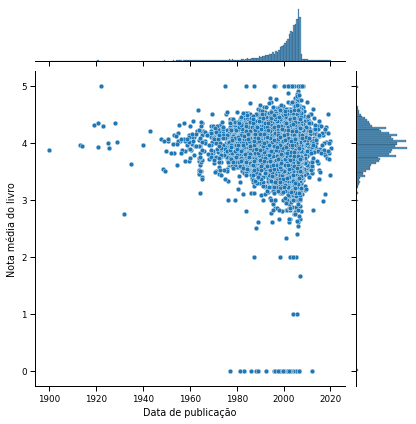

In [ ]:
plt.figure(figsize=(15,15))
sns.set_context('paper')
ax =sns.jointplot(x="publicacao_data",y='nota_media', kind='scatter',  data= df[['publicacao_data', 'nota_media']])
ax.set_axis_labels("Data de publicação", "Nota média do livro")
plt.show()

In [ ]:
df['nota_media'].describe()

count    11127.000000
mean         3.933664
std          0.352455
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: nota_media, dtype: float64

In [ ]:
df['numero_paginas'].describe()

count    11127.000000
mean       336.419969
std        241.215368
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: numero_paginas, dtype: float64

In [ ]:
df['avaliacoes_contagem'].describe()

count    1.112700e+04
mean     1.793516e+04
std      1.124790e+05
min      0.000000e+00
25%      1.040000e+02
50%      7.450000e+02
75%      5.006000e+03
max      4.597666e+06
Name: avaliacoes_contagem, dtype: float64

In [ ]:
df.sort_values('avaliacoes_contagem', ascending = False).head(10)

,bookID,titulo,autores,nota_media,lingua_codigo,numero_paginas,avaliacoes_contagem,revisoes_contagem,publicacao_data,editora
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,2006-09-06,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,2002-08-15,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,2001-01-30,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,2006-04-01,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,eng,398,2128944,13670,2003-09-05,Houghton Mifflin Harcourt
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,eng,122,2111750,29677,2003-05-06,NAL
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdce4b75d0>,
      dtype=object)

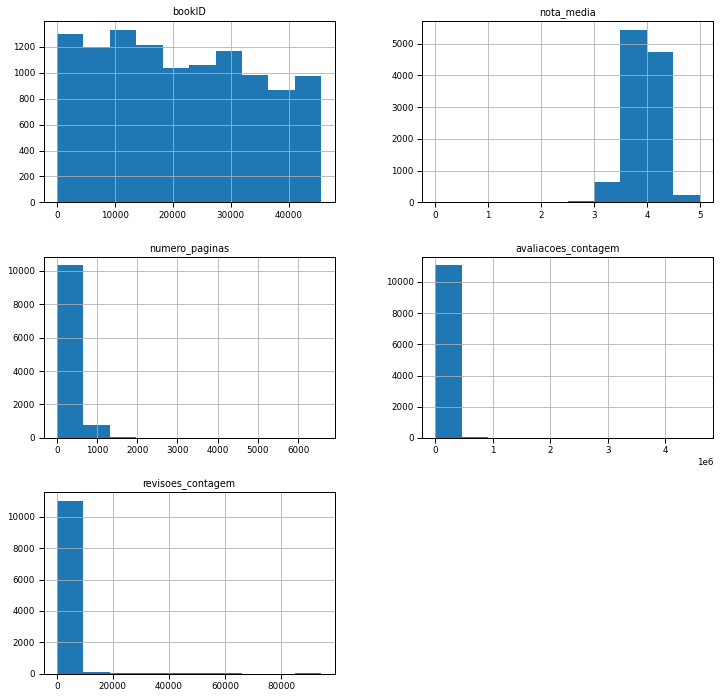

In [ ]:
#histograma para ter uma ideia da contagem:
df.hist(figsize=(12,12))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

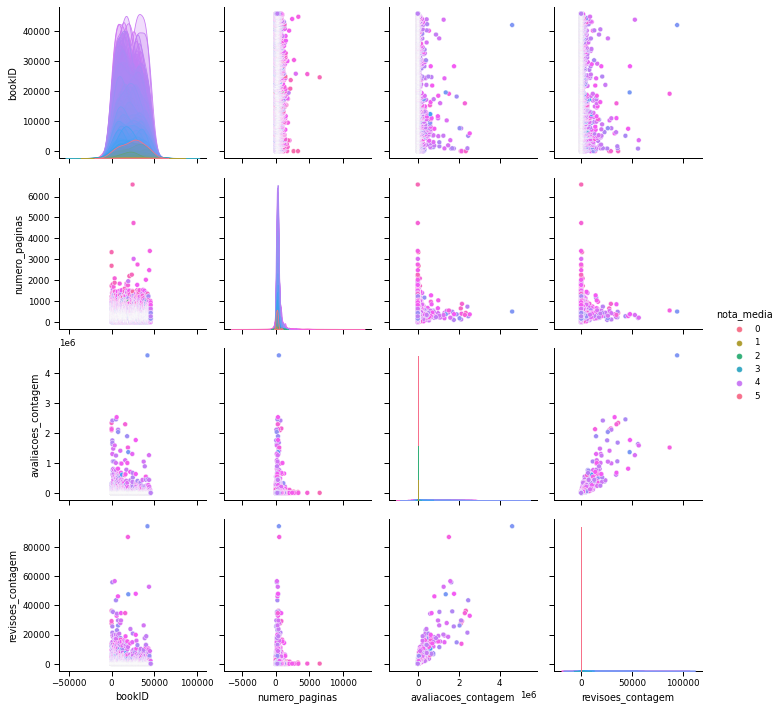

In [ ]:
sns.pairplot(df, hue="nota_media", palette="husl")

In [ ]:
df['titulo'].value_counts()

The Brothers Karamazov                        9
The Iliad                                     9
'Salem's Lot                                  8
The Odyssey                                   8
Anna Karenina                                 8
                                             ..
P.S. I Love You Three!                        1
La Petite Fille du Lac                        1
Aphrodite's Passion (Superhero Central #2)    1
The Story of Avis                             1
The Flanders Panel                            1
Name: titulo, Length: 10348, dtype: int64

***RESPOSTA PERGUNTA 5***

1:

**Livros mais avaliados**, célula 24: 

Twilight (Twilight #1)(4597666 vezes), The Hobbit or There and Back Again	(2530894 vezes), 
The Catcher in the Rye(2457092 vezes).

2:

Pode se observar um fenômeno interessante na célula 13, assim como o número de avaliações aumentou a partir de 
1990, também se aumentou o número de notas maiores e notas menores, contudo, **a "inclinação" para notas menores
é mais acentuada. Os livros modernos estão diminuindo de qualidade ?**

3:

**Livros mais citados**: Os irmãos Karamazoc(9), Ilíada(9), Anna Karenina(8), Odisseia(8).



********************************************************************

#**K mean Clustering com a nota média e o número de avaliações**

In [ ]:
#fazer um k mean clustering.
df2 = df.copy(deep=True)

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df2[['avaliacoes_contagem']])
df2['avaliacoes_contagem'] = scaler.transform(df2[['avaliacoes_contagem']])

scaler.fit(df2[['nota_media']])
df2['nota_media'] = scaler.transform(df2[['nota_media']])

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df2[['nota_media','avaliacoes_contagem']])

In [ ]:
df2['cluster']=y_predicted

In [ ]:
km.cluster_centers_

array([[0.72434163, 0.00257105],
       [0.82253494, 0.00466405]])

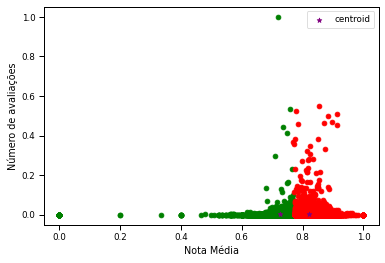

In [ ]:
df1 = df2[df2.cluster==0]
df2 = df2[df2.cluster==1]
df3 = df2[df2.cluster==2]
plt.scatter(df1.nota_media,df1['avaliacoes_contagem'],color='green')
plt.scatter(df2.nota_media,df2['avaliacoes_contagem'],color='red')
plt.scatter(df3.nota_media,df3['avaliacoes_contagem'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Nota Média')
plt.ylabel('Número de avaliações')
plt.legend()

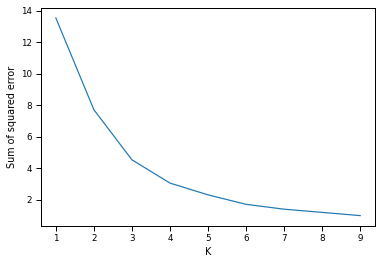

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2[['nota_media','avaliacoes_contagem']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
!apt update
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

import re, pathlib, shutil

# Get a list of all your Notebooks
notebooks = [x for x in pathlib.Path("/content/drive/My Drive/Colab Notebooks").iterdir() if 
             re.search(r"\.ipynb", x.name, flags = re.I)]

for i, n in enumerate(notebooks):
    print(f"\nProcessing  [{i+1:{len(str(len(notebooks)))}d}/{len(notebooks)}]  {n.name}\n")

    # Optionally copy your notebooks from gdrive to your vm
    shutil.copy(n, n.name)
    n = pathlib.Path(n.name)

    !jupyter nbconvert "{n.as_posix()}" --to pdf --output "{n.stem.replace(" ", "_")}"

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
